## Decision Bondary for Logistic Regression

**Overview:**

In this notebook, we load the Titanic dataset, preprocesses it, train a logistic regression model on two selected features ('Pclass' and 'Sex'), and then visualizes the decision boundary determined by the model. 
- The `plot_decision_boundary` function creates a meshgrid of points in the feature space and predicts the class labels for those points using the logistic regression model. 
- The decision boundary is then plotted to show how the logistic regression model separates the two classes based on the selected features.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the Titanic dataset (replace 'path/to/dataset.csv' with the actual path)
data = pd.read_csv('titanic_dataset/train.csv')

# Data preprocessing
data = data[['Survived', 'Pclass', 'Sex']]
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
#data['Age'].fillna(data['Age'].mean(), inplace=True)

# Separate features (X) and target (y)
X = data[['Pclass', 'Sex']]
y = data['Survived']

X.shape, y.shape

((891, 2), (891,))

In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [4]:
# Visualize the decision boundary
def plot_decision_boundary(X, y, model, title):
    """
    Plot the decision boundary of a binary classification model.

    Parameters:
        X: 2D array-like or DataFrame
            Feature matrix with shape (n_samples, n_features).
        y: 1D array-like or Series
            Target vector (class labels) with shape (n_samples,).
        model: Trained binary classification model
            The model must have a `predict` method to make predictions.
        title: str
            The title for the plot.

    Returns:
        None
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel('Pclass')
    plt.ylabel('Sex')
    plt.title(title)
    plt.show()


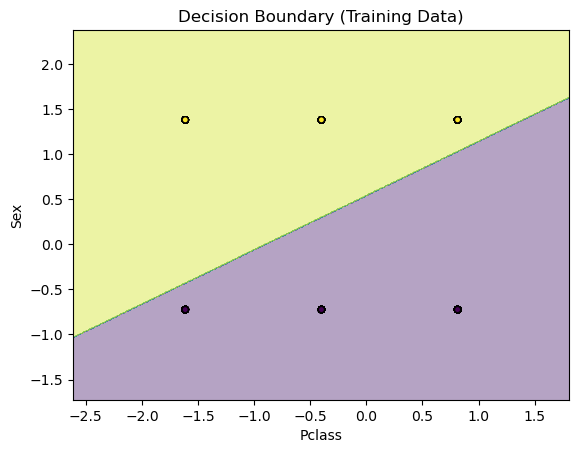

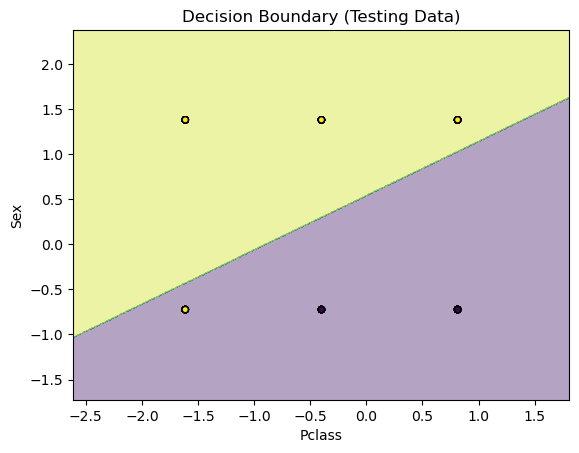

In [5]:

# For illustration, we consider only Pclass and Sex as features
X_train_pclass_sex = X_train_scaled[:, :2]
X_test_pclass_sex = X_test_scaled[:, :2]

# Plot the decision boundary for training data
plot_decision_boundary(X_train_pclass_sex, y_train, model, title='Decision Boundary (Training Data)')

# Plot the decision boundary for testing data
plot_decision_boundary(X_test_pclass_sex, y_test, model, title='Decision Boundary (Testing Data)')


<center><b><i>The End!</i></b></center>